![alt text](i.png)
# **YandexGPT**

In [4]:
from yandexgptlite import YandexGPTLite
account = YandexGPTLite('b1g40ih9vkcl3ce44hob', 'y0_AgAAAABDOmatAATuwQAAAAEM6u7IAAA3BzDC5OJHoImEL0vYxPon0E1tfQ')

`folder` - это ID папки на Yandex Cloud, в рамках которой вы общаетесь с моделью;   
`token` - полученный токен к вашему аккаунту на Яндексе;   
`prompt` - основной промпт;   
`temperature` - уровень творчества модели от 0 до 1 где 0 это максимально сухо, а 1 - это максимум творчества;   
`system_prompt` - системный промпт, где можно указывать стилистику ответа и другие пожелания не загружая основной промпт;   
`max_tokens` - ограничение расхода токенов (если кто-то захочет ограничить модель в использовании токенов);   
`model` - выбор своей модели: если вы используете дообученную модель, укажите "ds://<идентификатор_дообученной_модели>".   

In [5]:
text = account.create_completion(
    'Выдели ключевые слова из вопроса: "Вопрос спрашивает о сравнении уровня смертности в рамках программы помощи по КСГ (клинико-статистическая группа) 23.003 среди людей в возрасте от 15 до 49 лет в двух регионах: Чувашии и Удмуртской Республике, с целью определения, где зафиксировано больше смертей."',
    "1",
    system_prompt="отвечай на русском языке",
)
# print(text)

text

'**Ключевые слова:**\n\n- смертность;\n- программа помощи по КСГ 23.003;\n- возраст (15–49 лет);\n- регионы (Чувашия и Удмуртская Республика);\n- сравнение уровней смертности;\n- определение региона с наибольшим количеством смертей.'

### Бот

In [10]:
# BigTestingDotNew @DoctorApBot с синим цветочком
import pandas as pd
import numpy as np
import os
import sqlite3
import telebot
from telebot import types
from requests.exceptions import ConnectionError

# Токен
TOKEN = "7213028141:AAGztt3IBI8wDipz_gmXmbNhVagpnDqfwzU"  # token BigTestingDotNew
# Создание экземпляра бота
bot = telebot.TeleBot(TOKEN)

# меню (меню)
@bot.message_handler(commands=["start"])
def start(message):
    """меню бота"""
    try:
        # bot.delete_message(message.chat.id, message.message_id)
        bot.send_message(
            message.chat.id,
            text=f"""
            Здраствуйте, *{message.from_user.first_name}!*
    📖Этот чат-бот позволяет тестировать взаимодействие с *Yandex_GPT*""",
            parse_mode="Markdown",
        )
    except Exception as e:
        bot.send_message(message.chat.id, f"""🚫Общая ошибка: {e}
        ❗️Очистите историю, вернитесь в меню или обратитесь в службу поддержки""")

# обработка сообщений (не меню)
@bot.message_handler(content_types=["text"])
def handle_message(message):
    """обработка сообщений"""
    q = message.text
    aswer_ygpt = account.create_completion(
    f'Выдели ключевые слова из вопроса: "{q}?"',
    "1",
    system_prompt="отвечай на русском, не форматируй текст ответа",
    )
    bot.send_message(message.chat.id, f"Yandex GPT сказал: {aswer_ygpt}")

# запуск бота
bot.infinity_polling()

2024-08-09 13:06:32,935 (__init__.py:1102 MainThread) ERROR - TeleBot: "Infinity polling: polling exited"
2024-08-09 13:06:32,936 (__init__.py:1104 MainThread) ERROR - TeleBot: "Break infinity polling"


In [40]:
a = text.split("\n\n")[0]
lst = a.split(",")
lst
lst_a = []
for element in lst:
    element = "".join(x for x in element if x.isalnum() or x in [" ", "–", "-", "."])
    element = element.replace("Ключевые слова", "")
    lst_a.append(element)
b = ", ".join(lst_a)
b
text_2 = account.create_completion(
    f'Выдели ключевые слова из текста: "{b}"',
    "1",
    system_prompt="отвечай на русском языке",
)
text_2

'**Ключевые слова**: сравнение уровня смертности, программа помощи, КСГ 23.03, возраст, регионы, Чувашия, Удмуртская Республика.\n\nЭтот текст посвящён **сравнению уровня смертности в двух регионах** — **Чувашии и Удмуртской Республике**. Есть уточнение, что оба региона входят в возрастную категорию от 15 до 49 лет. Также упоминается **программа помощи по клинико-статистической группе (КСГ) 23.003**. \n\nВозможно, этот текст представляет статистические данные о смертности в этих регионах, а программа помощи является способом улучшения медицинской помощи в регионах с высоким уровнем смертности. Но для точного понимания смысла нужно прочитать весь текст.'

In [41]:
def simply(text):
    lst = text.split("\n\n")[0].split(",")
    lst_a = []
    for element in lst:
        element = "".join(x for x in element if x.isalnum() or x in [" ", "–", "-", "."])
        element = element.replace("Ключевые слова", "")
        lst_a.append(element)
    return ", ".join(lst_a)

In [60]:
# BigTestingDotNew @DoctorApBot с синим цветочком
import pandas as pd
import numpy as np
import os
import sqlite3
import telebot
from telebot import types
from requests.exceptions import ConnectionError


def simply(text):
    lst = text.split("\n\n")[0].split(",")
    lst_a = []
    for element in lst:
        element = "".join(
            x for x in element if x.isalnum() or x in [" ", "–", "-", "."]
        )
        element = (
            element.replace("Ключевые слова", "")
            .replace("ключевые слова", "")
            .replace("В этом тексте", "")
            .replace("В тексте", "")
            .replace("в этом тексте", "")
            .replace("в тексте", "")
            .replace("можно выделить", "")
            .replace("следующие", "")
            .replace("из текста", "")
        )
        lst_a.append(element)
    return ", ".join(lst_a)


def y_gpt(message):
    text = account.create_completion(
        f'Выдели ключевые слова из текста: "{message}?"',
        "1",
        system_prompt="отвечай на русском языке",
    )
    simply_text = simply(text)
    text_2 = account.create_completion(
        f'Выдели ключевые слова из текста: "{simply_text}"',
        "1",
        system_prompt="отвечай на русском языке",
    )
    # text_2
    return simply_text, simply(text_2)


# Токен
TOKEN = "7213028141:AAGztt3IBI8wDipz_gmXmbNhVagpnDqfwzU"  # token BigTestingDotNew
# Создание экземпляра бота
bot = telebot.TeleBot(TOKEN)


# меню (меню)
@bot.message_handler(commands=["start"])
def start(message):
    """меню бота"""
    try:
        # bot.delete_message(message.chat.id, message.message_id)
        bot.send_message(
            message.chat.id,
            text=f"""
            Здраствуйте, *{message.from_user.first_name}!*
    📖Этот чат-бот позволяет тестировать взаимодействие с *Yandex_GPT*""",
            parse_mode="Markdown",
        )
    except Exception as e:
        bot.send_message(
            message.chat.id,
            f"""🚫Общая ошибка: {e}
        ❗️Очистите историю, вернитесь в меню или обратитесь в службу поддержки""",
        )


# обработка сообщений (не меню)
@bot.message_handler(content_types=["text"])
def handle_message(message):
    """обработка сообщений"""
    aswer_ygpt_1, aswer_ygpt_2 = y_gpt(message.text)
    bot.send_message(
        message.chat.id,
        f"*Yandex GPT сперава сказал*: {aswer_ygpt_1}, *а засим добавил*: {aswer_ygpt_2}",
        parse_mode="Markdown",
    )


# запуск бота
bot.infinity_polling()

2024-08-08 17:25:23,589 (__init__.py:966 MainThread) ERROR - TeleBot: "Infinity polling: polling exited"
2024-08-08 17:25:23,589 (__init__.py:968 MainThread) ERROR - TeleBot: "Break infinity polling"


In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing import sequence
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
import pandas as pd
from sklearn.metrics import mean_squared_error

from keras.models import Model
from keras.layers import Input, Dense

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

In [143]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam

from keras.layers import Dense, Dropout, Activation

data_train_path = "C:/work/YandexGPT/train_data.xlsx"
df_data_train = pd.read_excel(data_train_path, sheet_name="train_data", index_col=None, dtype="str")

df_data_train["label"] = df_data_train["label"].astype("int")
train_data = df_data_train["reg_name_rus"].tolist()
tmp_list = []
for element in train_data:
    element = " ".join([x for x in element])
    tmp_list.append(element)
train_data = tmp_list
tknzr = Tokenizer(lower=False, split=" ")
tknzr.fit_on_texts(train_data)
X_train = tknzr.texts_to_sequences(train_data)
train_data = sequence.pad_sequences(X_train, maxlen=100)

train_label = df_data_train["label"].tolist()
n_classes = len(train_label)

# Определяем веса классов, где меньшие классы имеют больший вес
class_weights = {i: 1 / (train_label.count(i) + 1) for i in train_label}

train_data = np.array(train_data)
train_label = np.array(train_label)

# Создание модели
model = keras.Sequential()
model.add(layers.Embedding(10000, 16))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))
model.add(layers.Dense(n_classes, activation='softmax'))

# model = keras.Sequential()
# model.add(layers.Embedding(10000, 16))
# model.add(layers.GlobalAveragePooling1D())
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(n_classes, activation='softmax'))

# max_len = 100

# model = Sequential()
# model.add(Dense(64, input_shape=(max_len,)))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(32))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(Dense(n_classes))
# model.add(Activation('softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])
# target_size=(1848,)

# Создаем входной слой
# inputs = Input(shape=(1848,))

# Добавляем скрытые слои
# x = Dense(16, activation='relu')(inputs)

# Добавляем выходной слой
# predictions = Dense(n_classes, activation='softmax')(x)

# Создаем модель
# model = Model(inputs=inputs, outputs=predictions)

# Указываем размерность целевого вектора
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
# model.fit(train_data, train_label, class_weight=class_weights, epochs=10, batch_size=512)
model.fit(train_data, train_label, epochs=10, batch_size=1)
# 

# Подготовка прогнозирования
predict_data = "Янао"
tmp_list_predict = []
for element in predict_data:
    element = " ".join([x for x in element])
    tmp_list_predict.append(element)
predict_data = tmp_list_predict
tknzr.fit_on_texts(predict_data)
X_predict = tknzr.texts_to_sequences(predict_data)
# predict_data = sequence.pad_sequences(X_predict, maxlen=100)
X_predict = sum(X_predict, [])
lst_0 = [0]*(100-len(X_predict))
for element in X_predict:
    lst_0.append(element)
predict_data = lst_0
predict_data = np.array([predict_data])
predict_data

# Прогнозирование
predictions = model.predict(predict_data)
predictions[0][0]

Epoch 1/10
1848/1848 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0000e+00 - loss: 47.0170
Epoch 2/10
1848/1848 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 47.8291
Epoch 3/10
1848/1848 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 47.6629
Epoch 4/10
1848/1848 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 46.6205
Epoch 5/10
1848/1848 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 46.7507
Epoch 6/10
1848/1848 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 46.2799
Epoch 7/10
1848/1848 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 46.8156
Epoch 8/10
1848/1848 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 47.6566
Epoch 9/10
1848/1848 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 46.7266
Epoch 10/10
1848/1848 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 46.8988
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


0.00053887366

In [146]:
def pred(predict_data):
    tmp_list_predict = []
    for element in predict_data:
        element = " ".join([x for x in element])
        tmp_list_predict.append(element)
    predict_data = tmp_list_predict
    tknzr.fit_on_texts(predict_data)
    X_predict = tknzr.texts_to_sequences(predict_data)
    # predict_data = sequence.pad_sequences(X_predict, maxlen=100)
    X_predict = sum(X_predict, [])
    lst_0 = [0]*(100-len(X_predict))
    for element in X_predict:
        lst_0.append(element)
    predict_data = lst_0
    predict_data = np.array([predict_data])
    return predict_data

for element in df_data_train["reg_name_rus"].tolist(): 
    print(model.predict(pred(element))[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
0.00053900946
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0.0005389551
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
0.00053902576
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0.00053904695
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
0.00053899264
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0.00053918274
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
0.00053891964
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
0.0005388654
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0.00053887
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
0.0005389458
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0.0005388915
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
0.0005389998
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0.0005390508
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0.0005389965
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0.000539107
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0.0005390508
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0.0005389965
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
0.000539107
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0.0005390861
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

KeyboardInterrupt: 

In [132]:
# Подготовка прогнозирования
predict_data = "Астрахань"
tmp_list_predict = []
for element in predict_data:
    element = " ".join([x for x in element])
    tmp_list_predict.append(element)
predict_data = tmp_list_predict
tknzr.fit_on_texts(predict_data)
X_predict = tknzr.texts_to_sequences(predict_data)
# predict_data = sequence.pad_sequences(X_predict, maxlen=100)
X_predict = sum(X_predict, [])
lst_0 = [0]*(100-len(X_predict))
for element in X_predict:
    lst_0.append(element)
predict_data = lst_0
predict_data = np.array([predict_data])
predict_data

# Прогнозирование
predictions = model.predict(predict_data)
predictions[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


0.00054085895

In [2]:
# линейная регрессия

from sklearn.linear_model import LinearRegression

data_train_path = "C:/work/YandexGPT/train_data.xlsx"
df_data_train = pd.read_excel(data_train_path, sheet_name="train_data", index_col=None, dtype="str")

df_data_train["label"] = df_data_train["label"].astype("int")
train_data = df_data_train["reg_name_rus"].tolist()
tmp_list = []
for element in train_data:
    element = " ".join([x for x in element])
    tmp_list.append(element)
train_data = tmp_list
tknzr = Tokenizer(lower=False, split=" ")
tknzr.fit_on_texts(train_data)
X_train = tknzr.texts_to_sequences(train_data)
train_data = sequence.pad_sequences(X_train, maxlen=100)

train_label = df_data_train["label"].tolist()

model = LinearRegression()

model.fit(train_data, train_label)

LinearRegression()

In [44]:
predict_data = "Москва"
tmp_list_predict = []
for element in predict_data:
    element = " ".join([x for x in element])
    tmp_list_predict.append(element)
predict_data = tmp_list_predict
tknzr.fit_on_texts(predict_data)
X_predict = tknzr.texts_to_sequences(predict_data)
# predict_data = sequence.pad_sequences(X_predict, maxlen=100)
X_predict = sum(X_predict, [])
lst_0 = [0]*(100-len(X_predict))
for element in X_predict:
    lst_0.append(element)
predict_data = lst_0
predict_data = np.array([predict_data])

model.predict(predict_data)[0]

41.404277215272316

In [42]:
predict_data

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11,  1, 10,
         1, 14,  2, 21]])

In [4]:
# продукт Грефа

data_train_path = "C:/work/YandexGPT/train_data.xlsx"
df_data_train = pd.read_excel(data_train_path, sheet_name="train_data", index_col=None, dtype="str")

df_data_train["label"] = df_data_train["label"].astype("int")
train_data = df_data_train["reg_name_rus"].tolist()
tmp_list = []
for element in train_data:
    element = " ".join([x for x in element])
    tmp_list.append(element)
train_data = tmp_list
tknzr = Tokenizer(lower=False, split=" ")
tknzr.fit_on_texts(train_data)
X_train = tknzr.texts_to_sequences(train_data)
train_data = sequence.pad_sequences(X_train, maxlen=100)

train_label = df_data_train["label"].tolist()

train_data = np.array(train_data)
train_label = np.array(train_label)

# # Создание модели
model = keras.Sequential()
model.add(layers.Embedding(10000, 16))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# # Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Обучение модели
model.fit(train_data, train_label, epochs=10, batch_size=512)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0059 - loss: -18.1065 
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.0045 - loss: -110.2058 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0055 - loss: -213.4855 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0064 - loss: -333.8597 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0038 - loss: -473.3148 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.0044 - loss: -623.4444  
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0053 - loss: -799.8888 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0045 - loss: -994.8595 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.0062 - loss: -1202.7783
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0045 - loss: -1456.1716 


***
***
***

## **Линейная регрессия**

In [31]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data_path = "C:/work/YandexGPT/reg_ref_model.csv"
df_data = pd.read_csv(data_path, sep=";")

def predicting(word):
    """прогноз"""
    predict_data = word
    tmp_list_predict = []
    for element in predict_data:
        element = " ".join([x for x in element])
        tmp_list_predict.append(element)
    predict_data = tmp_list_predict
    tknzr.fit_on_texts(predict_data)
    X_predict = tknzr.texts_to_sequences(predict_data)
    X_predict = sum(X_predict, [])
    lst_0 = [0]*(100-len(X_predict))
    for element in X_predict:
        lst_0.append(element)
    predict_data = lst_0
    predict_data = np.array([predict_data])
    try:
        return df_data[df_data["label"] == int(round(model_lr.predict(predict_data)[0], 0))].iloc[0, 0], df_data[df_data["label"] == int(round(model_lr.predict(predict_data)[0], 0))].iloc[0, 2]
    except Exception as e:
        return "НЕ РАСПОЗНАНО", 0

train_data = df_data["reg_name_rus"].tolist()
tmp_list = []
for element in train_data:
    element = " ".join([x for x in element])
    tmp_list.append(element)
train_data = tmp_list
tknzr = Tokenizer(lower=False, split=" ")
tknzr.fit_on_texts(train_data)
X_train = tknzr.texts_to_sequences(train_data)
train_data = sequence.pad_sequences(X_train, maxlen=100)

df_td = pd.DataFrame(train_data)
df_data_full = df_td.merge(df_data["label"], left_index=True, right_index=True, how="left")

X, y = df_data_full[df_data_full.columns[:-1]], df_data_full["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
print(f"СКО по train: {round(mean_squared_error (y_train, model_lr.predict(X_train)), 1)}, СКО по test: {round(mean_squared_error (y_test, model_lr.predict(X_test)), 1)}")

СКО по train: 693.9, СКО по test: 745.3


In [32]:
label_list = []
for element in df_data["reg_name_rus"].tolist():
    text, label = predicting(element)
    label_list.append(label)
    print(element, " -> ", text, " -> ", label)
print(set(label_list))
print(len(label_list), len(set(label_list)))

Алтайский  ->  Пенза  ->  43
алтайский  ->  Пермский  ->  44
АЛТАЙСКИЙ  ->  Пенза  ->  43
Алтайский край  ->  Великий Новгород  ->  38
алтайский край  ->  Новосибирск  ->  39
АЛТАЙСКИЙ КРАЙ  ->  Новосибирск  ->  39
Амур  ->  Псков  ->  46
амур  ->  Приморский  ->  45
АМУР  ->  Приморский  ->  45
Амурская  ->  Приморский  ->  45
амурская  ->  Приморский  ->  45
АМУРСКАЯ  ->  Пермский  ->  44
Амурская обл  ->  Приморский  ->  45
амурская обл  ->  Приморский  ->  45
АМУРСКАЯ ОБЛ  ->  Пермский  ->  44
Амурская обл.  ->  Приморский  ->  45
амурская обл.  ->  Приморский  ->  45
АМУРСКАЯ ОБЛ.  ->  Пермский  ->  44
Амурская область  ->  Пенза  ->  43
Амурская Область  ->  Пенза  ->  43
амурская область  ->  Пермский  ->  44
АМУРСКАЯ ОБЛАСТЬ  ->  Орел  ->  42
Амурскаяобл  ->  Приморский  ->  45
амурскаяобл  ->  Приморский  ->  45
АМУРСКАЯОБЛ  ->  Пермский  ->  44
Амурскаяобл.  ->  Приморский  ->  45
амурскаяобл.  ->  Приморский  ->  45
АМУРСКАЯОБЛ.  ->  Пермский  ->  44
Амурскаяобласть  ->  Пен

In [33]:
str = "Владимир Владимирович Путин"
predicting(str)[0]

'чебоксары'

<Axes: ylabel='Frequency'>

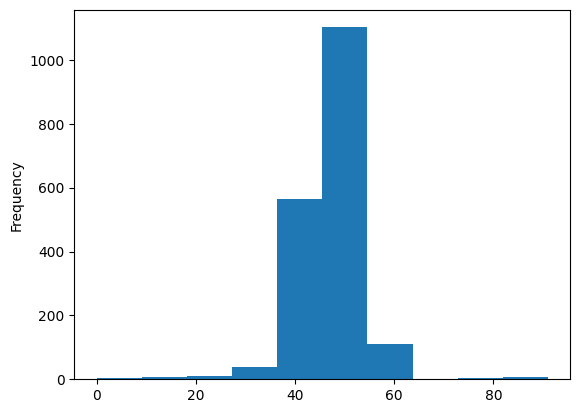

In [34]:
import matplotlib.pyplot as plt
df_ser = pd.Series((v for v in label_list))
df_ser.plot(kind="hist")
# df_ser.plot()

***
# **Наша нейросеть**
[Статья](https://tproger.ru/articles/pervoe-znakomstvo-s-nejronnymi-setjami-na-primere-tensorflow-2)

In [11]:
# библиотеки
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [12]:
data_train_path = "C:/work/YandexGPT/train_data.xlsx"
df_data_train = pd.read_excel(
    data_train_path, sheet_name="train_data", index_col=None, dtype="str"
)

df_data_train["label"] = df_data_train["label"].astype("int")
train_data = df_data_train["reg_name_rus"].tolist()
tmp_list = []
for element in train_data:
    element = " ".join([x for x in element])
    tmp_list.append(element)
train_data = tmp_list
tknzr = Tokenizer(lower=False, split=" ")
tknzr.fit_on_texts(train_data)
X_train = tknzr.texts_to_sequences(train_data)
train_data = sequence.pad_sequences(X_train, maxlen=100)

train_label = df_data_train["label"].tolist()
# n_classes = len(train_label)

train_data = np.array(train_data)
train_label = np.array(train_label)

X = train_data
Y = train_label

In [35]:
# Создадим модель
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(100,)),
        # tf.keras.layers.Dense(3, input_shape=(100,)),
        tf.keras.layers.Dense(15), # добавлено
        tf.keras.layers.Dense(15), # добавлено
        tf.keras.layers.Dropout(0.2), # добавлено
        tf.keras.layers.Dense(1),
    ]
)

# Скомпилируем
model.compile(optimizer="Adam", loss="mse", metrics=["mean_absolute_error"])

# Обучим
# model.fit(
#     X, # Набор входных данных
#     Y, # Набор правильных ответов
#     validation_split=0.2, # Этот параметр автоматически выделит часть обучающего набора на валидационные данные. В данном случа 20%
#     epochs=10, # Процесс обучения завершится после 10 эпох
#     batch_size = 8 # Набор данных будет разбит на пакеты (батчи) по 8 элементов набора в каждом.
# )

# Обратные выходы
# Если ошибка не уменьшается на протяжении указанного количества эпох, то процесс обучения прерывается и модель инициализируется весами с самым низким показателем параметра "monitor"
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",  # указывается параметр, по которому осуществляется ранняя остановка. Обычно это функция потреть на валидационном наборе (val_loss)
    patience=5,  # количество эпох по истечении которых закончится обучение, если показатели не улучшатся
    mode="min",  # указывает, в какую сторону должна быть улучшена ошибка
    restore_best_weights=True,  # если параметр установлен в true, то по окончании обучения модель будет инициализирована весами с самым низким показателем параметра "monitor"
)

model.fit(
    X,
    Y,
    validation_split=0.2,
    epochs=50,
    batch_size=8,
    callbacks=early_stopping,
)

Epoch 1/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1113.8284 - mean_absolute_error: 27.0554 - val_loss: 2775.0317 - val_mean_absolute_error: 50.7524
Epoch 2/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 748.0327 - mean_absolute_error: 21.8033 - val_loss: 2824.4744 - val_mean_absolute_error: 51.3486
Epoch 3/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 743.5895 - mean_absolute_error: 22.3874 - val_loss: 2566.0212 - val_mean_absolute_error: 48.5615
Epoch 4/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 761.8901 - mean_absolute_error: 22.4497 - val_loss: 3148.6978 - val_mean_absolute_error: 54.5099
Epoch 5/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 715.9576 - mean_absolute_error: 21.7238 - val_loss: 2726.6692 - val_mean_absolute_error: 50.3246
Epoch 6/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 651.0634 - mean_absolute_error: 20.5874 - val_loss: 2694.1287 - val_mean_absolute_error: 50.0830
Epoch 7/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/

In [43]:
# оценка модели
X_test = np.array(np.random.random((100, 100)))
Y_test = np.array(np.random.random((100)))

res = model.evaluate(X_test, Y_test)
print("loss and mean_absolute_error", res)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.7040 - mean_absolute_error: 2.6955 
loss and mean_absolute_error [7.388035297393799, 2.636730909347534]


In [44]:
X_test

array([[0.68720118, 0.90988953, 0.30438776, ..., 0.50479722, 0.51344234,
        0.75888254],
       [0.79859329, 0.29319709, 0.57769562, ..., 0.93721443, 0.74463214,
        0.7598271 ],
       [0.43719666, 0.335164  , 0.61345803, ..., 0.26630073, 0.48260028,
        0.36651352],
       ...,
       [0.12456322, 0.9174781 , 0.53339127, ..., 0.4815723 , 0.01260054,
        0.58889679],
       [0.75527859, 0.72599389, 0.30047749, ..., 0.61294539, 0.92972037,
        0.18498915],
       [0.18488305, 0.49275722, 0.10549847, ..., 0.23836408, 0.08977278,
        0.43148045]])

In [37]:
# Подготовка прогнозирования
data = "Серёжа Еремеев"

def predict(data):
    predict_data = data
    tmp_list_predict = []
    for element in predict_data:
        element = " ".join([x for x in element])
        tmp_list_predict.append(element)
    predict_data = tmp_list_predict
    tknzr.fit_on_texts(predict_data)
    X_predict = tknzr.texts_to_sequences(predict_data)
    X_predict = sum(X_predict, [])
    lst_0 = [0]*(100-len(X_predict))
    for element in X_predict:
        lst_0.append(element)
    predict_data = lst_0
    predict_data = np.array([predict_data])
    predictions = model.predict(predict_data)
    return int(round(predictions[0][0], 0))

predict(data)
df_data_train[df_data_train["label"] == predict(data)].iloc[0,0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


'Самара'

In [38]:
label_list = []
df_data = df_data_train.copy()
for element in df_data["reg_name_rus"].tolist():
    label = predict(element)
    label_list.append(label)
    try:
        region = df_data_train[df_data_train["label"] == label].iloc[0,0]
    except IndexError:
        region = "НЕ РАСПОЗНАН"
    print(element, " -> ", region, " -> ", label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Алтайский  ->  Нижегородская  ->  36
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
алтайский  ->  НАРЬЯН-МАР  ->  35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
АЛТАЙСКИЙ  ->  элиста  ->  54
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Алтайский край  ->  Ленинградская  ->  29
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
алтайский край  ->  Ленинградская  ->  29
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
АЛТАЙСКИЙ КРАЙ  ->  УЛАН-УДЭ  ->  50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Амур  ->  Курган  ->  27
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
амур  ->  Краснодар  ->  25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
АМУР  ->  НАРЬЯН-МАР  ->  35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Амурская  ->  Балкария  ->  17
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
амурская  ->  Иваново  ->  16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
АМУРСКАЯ  ->  Колыма  ->  31
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Амурская обл  ->  Краснодар  ->  25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
амурская обл  ->  Краснодар  ->  25
1/

<Axes: ylabel='Frequency'>

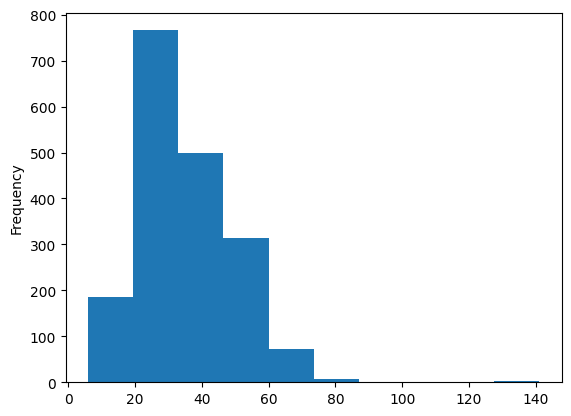

In [40]:
import matplotlib.pyplot as plt
df_ser = pd.Series((v for v in label_list))
df_ser.plot(kind="hist")